# AQ2 Ribbon Cutting

In [43]:
import timeit
import matplotlib.pyplot as plt

## 1. Naive Recursive Algorithm

---

### Idea
The general idea behind a recursive algorithm for calculating the maximum product of a ribbon of length $n$, is that we find **all possible ways** to cut the ribbon into two parts $(a, b)$. For each pair of parts, we want to find **two** products:

1. The product of the lengths.
1. The product of part $a$ and the maximum product of $b$. 

We take the **max** of the two products because the length of part $b$ is **not necessarily** the maximum product of $b$. The max will be a **candidate maximum product** for the ribbon.

Do this for all possible pairs of the ribbon and find the max of all candidate maximum products. This value will be the maximum product of the ribbon.

#### Steps
1. Find all ways to cut the ribbon into two parts $(a, b)$.
1. For each pair, find the product of the lengths.
1. For each pair, find the product of the first cut and the maximum product of the second cut.
1. For each pair, get the max of the two products.
1. If the max is greater than the existing max, replace it.

#### Example, n = 3
For $n=3$ our possible pairs are $(1, 2), (2, 1)$. 

Products of lengths is $1 \times 2 = 2$ and $2 \times 1 = 2$.

Max products of the second cuts are $max\_product(2) = 1 \times 1 = 1$ and $max\_product(1) = 0$

Max of the products of the second cuts and the products of the lengths is $max(2, 1) = 2$ and $max(2, 0) = 2$.

Max of the product of lengths is $max(2, 2) = 2$.

The maximum product of a ribbon of length $3$ is $2$.

---

### Algorithm

#### Base Case
We know that the max of a ribbon of length 0 or 1 is 0, because there is no way to cut the ribbon into integer sized pieces. A ribbon of length 0 is a ribbon that doesn't exist. A ribbon of length 1 cannot be cut without creating pieces that are of non-integer sizes.

$max\_product(0) = max\_product(1) = 0$.

#### Other cases
For ribbons that have length $n > 1$, we do parts 1 - 5 as described in the Steps section. 

In [44]:
def max_ribbon_product_naive(n):
    """Recursively calculates the maximum product of integer sized pieces of a ribbon of length n.

    :args
    n - integer that is the length of the ribbon.

    :return
    an integer that is the maximum product.
    """
    # base case
    if n <= 1:
        return 0

    max_product = 0

    # 1
    for ribbon_length_to_remove in range(1, n):
        remaining_ribbon = n - ribbon_length_to_remove
        smaller_ribbon_product = ribbon_length_to_remove * max_ribbon_product_naive(remaining_ribbon)
        
        # 2
        product_of_ribbon_lengths = ribbon_length_to_remove * smaller_ribbon_product
        
        # 3
        product_of_length_and_max_product = ribbon_length_to_remove * (remaining_ribbon - ribbon_length_to_remove)
        
        # 4
        current_max = max(product_of_ribbon_lengths, product_of_length_and_max_product)
        
        # 5
        max_product = max(current_max, max_product)

    return max_product

## 2. Naive Ribbon Cutting Recursion Tree
The image below shows a recursion tree for the naive ribbon cutting when $n=4$. To calculate the maximum product for $n=4$, we do a depth first traversal from left to right.

This approach means that we perform unnecessary computations, as $max\_ribbon\_product\_naive(2)$ is computed twice for example. For small values of $n$ this is not a problem, howeverr as $n$ grows to larger values, the number of redundant computations being made grows exponentially.

---
![naive_ribbon_recursive_tree](docs/naive_ribbon_recursion_tree.svg)

---

### Complexity
Let $R(n)$ be the function that computes the product of ribbon of length $n$. In the naive function, we have a loop from $1 - n$ in which we make $n - 2$ recursive calls. Hence, we can write the cost of the function $R(n)$ as:

$$ R(n) = R(n-1) + R(n-2) + R(n-3) + ... + R(1)$$

Let us look at the individual terms of this sum. The cost of $R(n1)$ is:

$$R(n-1) = R(n-2) + R(n-3) + ... + R(1)$$

The terms coming after $R(n-1)$ in the first sum are actually equal to $R(n-1)$, as can be seen above. Substituting we get that:

$$R(n) = R(n-1) + R(n-1) = 2R(n-1)$$

Following this logic for all $(n - k)$, we get:

\begin{align}
R(n) &= R(n-1) + R(n-2) + R(n-3) + ... + R(1) \\ 
& = R(n-1) + R(n-1) \\
& = 2R(n-1) \\
& = 2 \times 2R(n-2) \\
& = 2 \times 2 \times 2R(n-3) \\
& = 2^{n-1} \times 2R(n-(n-1)) \\
& = 2^{n-1} \times 2R(1) \\
& = 2^{n-1} \\
\end{align}

Which is an exponential time complexity $O(2^n)$.

---

## 3. Dynamic Ribbon Cutting
The dynamic programming version of the ribbon cutting algorithm mostly follows the same steps as the naive version. 

The difference that makes this version much faster is that a dictionary is used to store results once they are calculated. Each entry in the dictionary is a key-value pair of the ribbon length that is currently checked and the maximum product of that ribbon length. 

Whenever the function is called for a ribbon length $n$, the dictionary is checked for an entry $n$. If found, the value from the dictionary is returned. This basically gives us $O(1)$ for an $n$ that has already been computed (depending on the hash function).

In [45]:
def max_ribbon_product_dynamic(n, seen):
    """Calculates the maximum product of integer sized pieces of a ribbon of length n using dynamic programming.

    :args
    n - integer that is the length of the ribbon.
    seen - a dictionary of seen values.

    :return
    an integer that is the maximum product.
    """
    if n in seen:
        return seen[n]
    
    # base case
    if n <= 1:
        seen[n] = 0
        return seen[n]

    max_product = 0

    for ribbon_length_to_remove in range(1, n):
        remaining_ribbon = n - ribbon_length_to_remove
        seen_max_product = max_ribbon_product_dynamic(remaining_ribbon, seen)
        seen[remaining_ribbon] = seen_max_product
        ribbon_length_product = ribbon_length_to_remove * seen_max_product            
        
        # 2
        product_of_ribbon_lengths = ribbon_length_to_remove * ribbon_length_product
        
        # 3
        product_of_length_and_max_product = ribbon_length_to_remove * (remaining_ribbon - ribbon_length_to_remove)
        
        # 4
        current_max = max(product_of_ribbon_lengths, product_of_length_and_max_product)
        
        # 5
        max_product = max(current_max, max_product)

    return max_product

## Dynamic Ribbon Cutting Recursion Tree
The image below shows a recursion tree for the dynamic ribbon cutting when $n=4$. To calculate the maximum product for $n=4$, we do a depth first traversal from left to right.

In contrast to the naive ribbon recursion tree, we can eliminate the right hand branch because by the time we ask for $max_ribbon_product_dynamic(2)$, we have already calculated it in the left branch.

For smaller values for $n$, the computational difference is small. As $n$ grows however, the gain made by eliminating branches is significant, and the overall function becomes polynomial instead of exponential.

---

![dynamic_ribbon_recursion_tree](docs/dynamic_ribbon_recursion_tree.svg)

---

### Complexity
Using dynamic programming, we only have to go down the recursive tree once until we hit the first leaf. Once we have done that, we will have a value stored for each $n$ and retrieving the value is a constant time $O(1)$. 

We are still making $n-1$ recursive calls, however for each recursive call we don't need to go down the entire tree. Only the traversal to the first leaf goes all the way down. This means that once we have done $n-1$ iterations, all other computations we need to do are constants.

Again, let the cost of the ribbon function $R(n)$ be 

$$ R(n) = R(n-1) + R(n-2) + R(n-3) + ... + R(1)$$

Calculating $R(n-1)$ means that we now have calculated and stored the values for all $R(n-k)$, which means that all other terms become constants and we end up with $(n-1)(n-2)$.

\begin{align}
R(n) &= R(n-1) + R(n-2) + R(n-3) + ... + R(1) \\ 
& = R(n-1) + 1 + 1 + ... + 1 \\
& = n-1 \times ((n-2) \times 1)  \\
& = (n-1) \times (n-2) \\
& = n^2 - 3n + 2 \\
\end{align}

Which is a polynomial time complexity $O(n^2)$ as $n^2$ is the dominating term.

In [46]:
naive_times = []
dynamic_times = []

n_dynamic_runs = int(10e4)

for ribbon_length in range(2, 26):
    naive_time = timeit.timeit(stmt='max_ribbon_product_naive(ribbon_length)', setup='pass', number=1, globals=globals())
    dynamic_time = timeit.timeit(stmt='max_ribbon_product_dynamic(ribbon_length, {})', setup='pass', number=n_dynamic_runs, globals=globals())
    
    naive_times.append(naive_time)
    dynamic_times.append(dynamic_time / n_dynamic_runs)

Text(0, 0.5, 'Execution Time in seconds')

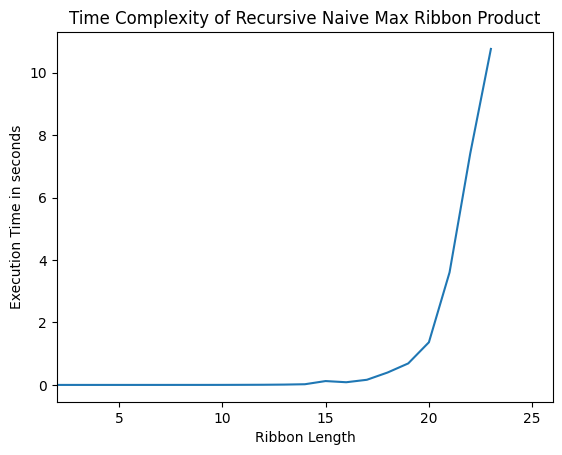

In [47]:
plt.plot(naive_times)
plt.xlim(2, 26)
plt.title("Time Complexity of Recursive Naive Max Ribbon Product")
plt.xlabel("Ribbon Length")
plt.ylabel("Execution Time in seconds")

Text(0, 0.5, 'Execution Time in seconds')

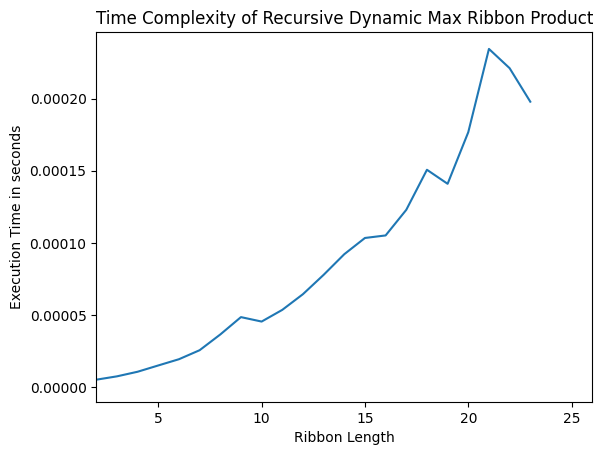

In [48]:
plt.plot(dynamic_times)
plt.xlim(2, 26)
plt.title("Time Complexity of Recursive Dynamic Max Ribbon Product")
plt.xlabel("Ribbon Length")
plt.ylabel("Execution Time in seconds")